In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("C:\\Users\\saurabh\\Desktop\\pyth\\newplacementdata.csv")

In [3]:
df.head() 

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [4]:
# even  = ((n/2)+ ((n/2)+1))/2 
# odd = ((n/2)+1)

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 

C:\Users\saurabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saurabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


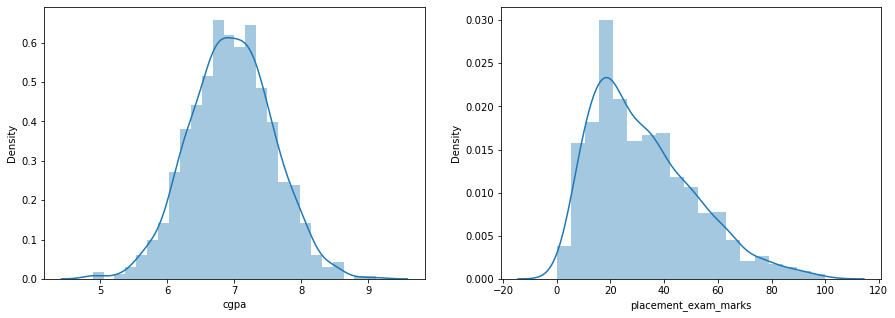

In [9]:
plt.figure(figsize = (15,5)) 
plt.subplot(121) 
sns.distplot(df['cgpa'])
plt.subplot(122) 
sns.distplot(df['placement_exam_marks']) 
plt.show() 


In [10]:
df['placement_exam_marks'].describe() 

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

C:\Users\saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

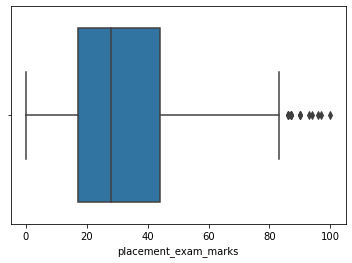

In [11]:
sns.boxplot(x =  df['placement_exam_marks']) 

In [14]:
# Finding the IRQ 

percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75) 

In [15]:
percentile25

17.0

In [16]:
percentile75

44.0

In [17]:
IQR = percentile75 - percentile25 
IQR 

27.0

In [18]:
upper_limit = percentile75 + 1.5*IQR 
upper_limit

84.5

In [19]:
lower_limit = percentile25 - 1.5*IQR  
lower_limit 

-23.5

# Finding Our Outliers 

In [22]:
df[df['placement_exam_marks']> upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [23]:
df[df['placement_exam_marks']< lower_limit]

,cgpa,placement_exam_marks,placed


In [24]:
# Trimming (Outlier Removing technique 1) 

In [25]:
newdf = df[df['placement_exam_marks'] < upper_limit] 

In [26]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [27]:
# Comparision 

C:\Users\saurabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\saurabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms

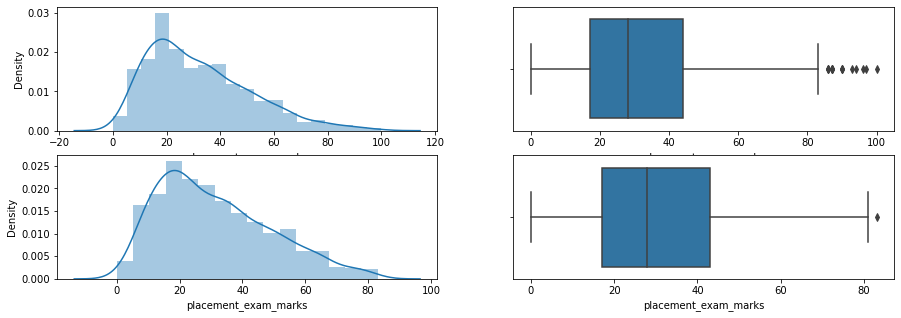

In [32]:
plt.figure(figsize = (15,5)) 
plt.subplot(221)  
sns.distplot(df['placement_exam_marks']) 

plt.subplot(222) 
sns.boxplot(df['placement_exam_marks']) 

plt.subplot(223) 
sns.distplot(newdf['placement_exam_marks']) 

plt.subplot(224)
sns.boxplot(newdf['placement_exam_marks']) 
plt.show() 


In [33]:
# Capping(Outlier Removing technique 2) 

In [34]:
new_df_cap = df.copy() 

In [35]:
# min = 5  , max 15 

# min 4 , 3 , 1 
# max = 20 , 30 , 50 

# updated_min_value = 1 
# updated_max_value = 50 

In [36]:
new_df_cap['placement_exam_marks'] = np.where(
    
    new_df_cap['placement_exam_marks'] > upper_limit , 
    upper_limit , 
    
    np.where(
    new_df_cap['placement_exam_marks'] < lower_limit , 
    lower_limit , 
    new_df_cap['placement_exam_marks'])


)

In [37]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [38]:
new_df_cap.shape

(1000, 3)

In [39]:
# Comparision 

C:\Users\saurabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\saurabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms

<AxesSubplot:xlabel='placement_exam_marks'>

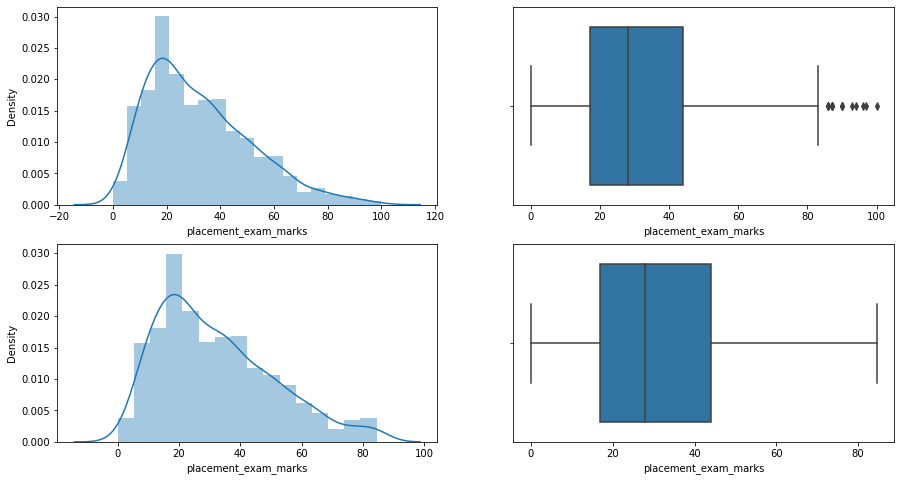

In [45]:
plt.figure(figsize = (15,8)) 
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])

plt.subplot(222) 
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223) 
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(new_df_cap['placement_exam_marks'])